In [16]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import myUtils as ut
import math
import numpy as np
import pandas as pd
import random
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
ut.import_data()

In [4]:
sequences_ne = ut.parse_sequences("nonAMP_sequence\\nonAMP_sequence.fasta")
sequences_po = ut.parse_sequences("AMP_sequence\\AMP_sequence.fasta")

random.Random(42).shuffle(sequences_ne)
random.Random(42).shuffle(sequences_po)

print("Count positive AMP:", len(sequences_po))
print("Count negative AMP:", len(sequences_ne))

Count positive AMP: 3268
Count negative AMP: 166791


In [5]:
train_po = sequences_po[:-500]
train_ne = sequences_ne[:8000]

random.Random(42).shuffle(train_ne)
train_ne = train_ne[:len(train_po)]

max_len = max([len(x) for x in (train_po + train_ne)]) + 1
print(max_len)

256


In [6]:
test_po = sequences_po[-500:]
test_ne = sequences_ne[-2000:]

print(max([len(x) for x in (test_po + test_ne)]) + 1)

256


In [7]:
def encode_aa(seq):
    dic = {'A':1, 'R':2, 'N':3, 'D':4, 'C':5, 'E':6, 'Q':7, 'H':8, 'I':9, 'L':10, 'K':11, 'M':12, 'F':13, 'P':14, 'S':15, 'T':16, 'W':17, 'Y':18, 'V':19, 'G':20}
    encode = []
    for i in range(max_len):
        e = [0]*20
        if i < len(seq):
            pos = dic[str(seq[i])]
            e[pos-1] = 1
        encode.append(e)
    return {'code':encode}
    

In [8]:
train_data = ut.prep_data(train_po,train_ne, [encode_aa], verbose=True)
train_data = train_data.sample(frac=1)
train_data

Extraced 2 features from 5536 sequences


,code,activity
1483,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",1
1560,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1044,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
5380,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
2071,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...",1
...,...,...
4414,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
1825,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
5528,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
1991,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...",1


In [9]:
test_data = ut.prep_data(test_po,test_ne, [encode_aa], verbose=True)
test_data = test_data.sample(frac=1)
test_data

Extraced 2 features from 2500 sequences


,code,activity
2296,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
903,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",0
1353,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
1957,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...",0
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",1
...,...,...
1480,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",0
947,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",0
43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
361,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [10]:
train_X = train_data['code']
train_X = np.array([np.array(val) for val in train_X])
train_Y = train_data['activity']

In [11]:
test_X = test_data['code']
test_X = np.array([np.array(val) for val in test_X])
test_Y = test_data['activity']

In [17]:
X = train_X
Y = train_Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [44]:
input_layer = tf.keras.layers.Input(shape=(max_len, 20), name='input')

#input_layer = tf.keras.layers.BatchNormalization()(input_layer)
convolution_1 = tf.keras.layers.Conv1D(4,(4,), input_shape=(max_len, 20), name='conv1D')(input_layer)

batch_norm_1 = tf.keras.layers.BatchNormalization()(convolution_1)

max_pool_1 = tf.keras.layers.MaxPool1D((4,))(batch_norm_1)
max_pool_1 = tf.keras.layers.Flatten()(max_pool_1)

convolution_2 = tf.keras.layers.Conv1D(8,(8,))(batch_norm_1)
batch_norm_2 = tf.keras.layers.BatchNormalization()(convolution_2)

max_pool_2 = tf.keras.layers.MaxPool1D((8,))(batch_norm_2)
max_pool_2 = tf.keras.layers.Flatten()(max_pool_2)

convolution_3 = tf.keras.layers.Conv1D(16,(16,))(batch_norm_2)
batch_norm_3 = tf.keras.layers.BatchNormalization()(convolution_3)

max_pool_3 = tf.keras.layers.MaxPool1D((16,))(batch_norm_3)
max_pool_3 = tf.keras.layers.Flatten()(max_pool_3)

concat = tf.keras.layers.concatenate([max_pool_3])



dense = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(concat)
dense = tf.keras.layers.Dropout(0.5)(dense)
dense = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(dense)
dense = tf.keras.layers.Dropout(0.5)(dense)
#dense = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(dense)
#dense = tf.keras.layers.Dropout(0.4)(dense)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=4e-4),metrics=['accuracy'])

model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 256, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1D (Conv1D)                 │ (None, 253, 4)         │           324 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 253, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 246, 8)         │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 246, 8)         │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 231, 16)        │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 231, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_5 (Concatenate)     │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,653 (25.99 KB)

 Trainable params: 6,597 (25.77 KB)

 Non-trainable params: 56 (224.00 B)

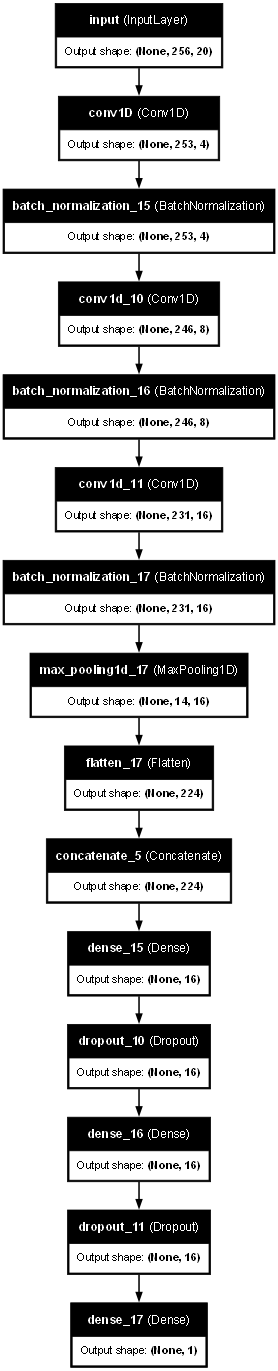

In [45]:
tf.keras.utils.plot_model(model, to_file='CNN-model_plot.png', dpi=55, show_shapes=True, show_layer_names=True)

In [46]:
X = train_X
Y = train_Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, shuffle=True)
#history = model.fit(train_X, train_Y, epochs=100, batch_size=100, validation_split=0.1, shuffle=True, callbacks=tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True))

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6028 - loss: 5.2145 - val_accuracy: 0.8721 - val_loss: 3.5341
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7490 - loss: 3.2087 - val_accuracy: 0.8757 - val_loss: 2.3474
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7820 - loss: 2.2087 - val_accuracy: 0.8786 - val_loss: 1.6194
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8169 - loss: 1.5635 - val_accuracy: 0.8772 - val_loss: 1.1778
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8496 - loss: 1.1586 - val_accuracy: 0.8786 - val_loss: 0.9004
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8543 - loss: 0.9360 - val_accuracy: 0.8837 - val_loss: 0.7176
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8699 - loss: 0.7532 - val_accuracy: 0.8880 - val_loss: 0.5955
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8817 - loss: 0.6432 - val_accu

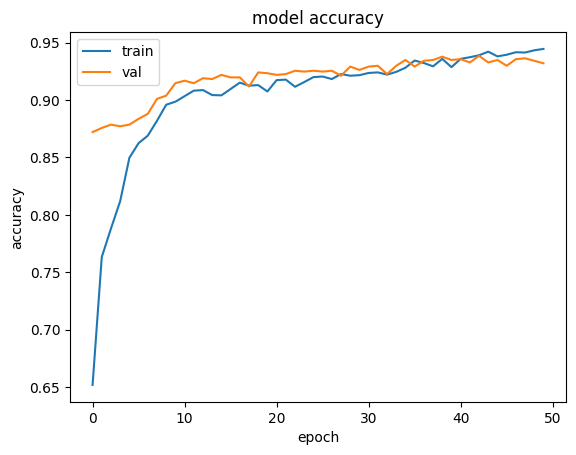

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

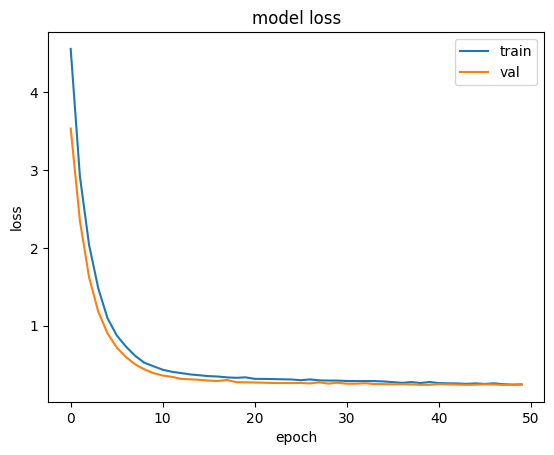

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [49]:
pred_probability = model.predict_on_batch(test_X)
pred_classes = []
threshold = 0.5
for i in range(len(test_X)):
    if pred_probability[i][0] > threshold:
        res = 1
    else: res = 0
    pred_classes.append([res,test_Y.values[i]])

In [50]:
TP = 0
FP = 0
TN = 0
FN = 0
for pred, res in pred_classes:
    if pred == 1:
        if res == 1:
            TP += 1
        else:
            FP += 1
    
    if pred == 0:
        if res == 0:
            TN += 1
        else:
            FN += 1

confusion_matrix = [[TP,FP],[FN,TP]]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

TP: 475
FP: 168
TN: 1832
FN: 25


In [51]:
def matthews_cor(conf_mat):
    n11 = conf_mat[0][0]/1000
    n10 = conf_mat[0][1]/1000
    n01 = conf_mat[1][0]/1000
    n00 = conf_mat[1][1]/1000
    return (n11*n00 - n10*n01) / (np.sqrt((n11+n10)*(n01+n00)*(n10+n00)*(n11+n01)))
    

matthews_cor(confusion_matrix)

0.6887247278382581

In [38]:
print("Positive classification accuracy:", round(100*TP/(TP + FP),2))
print("Negative classification accuracy:", round(100*TN/(TN + FN),2))

Positive classification accuracy: 83.83
Negative classification accuracy: 98.81


In [ ]:
#model.save('Models\CNN-1D.keras')